# BORGLPT to Galaxies
Python notebook to take BORG2LPT simulations and make mock galaxy cubes in comoving space

In [2]:
%load_ext autoreload
%autoreload 2

import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from os.path import join as pjoin
from tools.utils import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


ModuleNotFoundError: No module named 'astropy'

In [2]:
wdir = '/home/mattho/data'
theta = np.loadtxt(pjoin(wdir, 'quijote', 'latin_hypercube_params.txt'))

[0.1821  0.04809 0.5865  0.9565  0.8101 ]


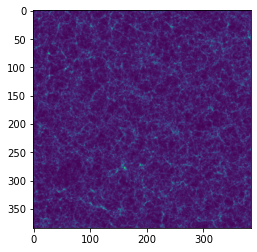

In [3]:
i = 10 # np.random.randint(1000)
print(theta[i])
rho = np.load(pjoin(wdir, f'cmass-ili/borg-quijote/latin_hypercube_HR-L3000-N384/{i}',
                    'rho.npy'))
plt.imshow(np.mean(rho[100:110], axis=0))

In [4]:
def load_rho(snid):
    rho = np.load(pjoin(wdir, 
                        f'quijote/density_field/latin_hypercube/{snid}',
                        'df_m_128_z=0.npy'))
    return rho

def load_halos(snid):
    snapdir = f'/home/mattho/data/quijote/Halos/latin_hypercube/{snid}'
    pos_h, mass, vel_h, Npart = load_quijote_halos(snapdir)
    posm = np.concatenate([pos_h, np.log10(mass)[:,None]], axis=1)
    out, _ = np.histogramdd(
        posm, 
        (128,128,128,10),
        range=[(0,1e3)]*3+[(12.8,15.8)]
    )
    return out

In [5]:
N = 1
rho = np.array([load_rho(i) for i in range(N)])
hhalo = np.array([load_halos(i) for i in range(N)])

[0.1821  0.04809 0.5865  0.9565  0.8101 ]


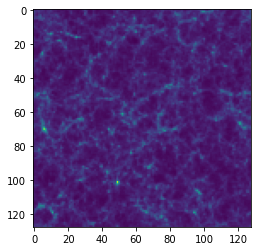

In [6]:
# i = 1 # np.random.randint(1000)
print(theta[i])
plt.imshow(np.mean(rho[-1][100:110], axis=0))

IndexError: index 4 is out of bounds for axis 0 with size 1

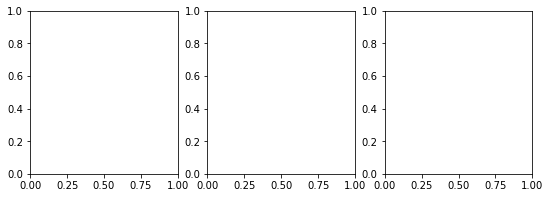

In [20]:
n = 3
f, axs = plt.subplots(1,n, figsize=(3*n,3))
for i in range(n):
    axs[i].imshow(np.mean(hhalo[4][100:110,...,i], axis=0))
    axs[i].axis('off')

In [7]:
from multiprocessing import Pool

def f(ind):
    law = TruncatedPowerLaw()
    popt = law.fit(rho.flatten(), hhalo[...,ind].flatten())
    return popt

out = np.array(map(f, range(10)))
print(out)

/home/mattho/git/cmass-ili/tools/utils.py:134: RuntimeWarning: divide by zero encountered in log
  loss = np.mean(ngal_mean - count_field * np.log(ngal_mean))
/home/mattho/git/cmass-ili/tools/utils.py:134: RuntimeWarning: invalid value encountered in multiply
  loss = np.mean(ngal_mean - count_field * np.log(ngal_mean))


Optimization terminated successfully.
         Current function value: 0.166256
         Iterations: 299
         Function evaluations: 515
Power law bias fit params: [0.59258007 0.         0.89106657 2.81125909]
Optimization terminated successfully.
         Current function value: 0.113654
         Iterations: 247
         Function evaluations: 430
Power law bias fit params: [0.50646564 0.         0.8845522  3.41196616]
Optimization terminated successfully.
         Current function value: 0.057587
         Iterations: 468
         Function evaluations: 797
Power law bias fit params: [4.11366820e-01 7.07622241e-08 8.13212777e-01 5.23286568e+00]


/home/mattho/git/cmass-ili/tools/utils.py:140: RuntimeWarning: Maximum number of function evaluations has been exceeded.
  result = minimize(


Power law bias fit params: [ 0.46379596  0.01583133  0.69225094 11.03586089]
Power law bias fit params: [0.05043707 0.66674758 0.80223184 6.87030194]
Optimization terminated successfully.
         Current function value: 0.003895
         Iterations: 227
         Function evaluations: 412
Power law bias fit params: [3.90510779e-04 2.23780825e+00 8.87022405e-01 6.61346975e-01]
Optimization terminated successfully.
         Current function value: 0.001003
         Iterations: 291
         Function evaluations: 520
Power law bias fit params: [5.91326317e-05 2.51510114e+00 7.99527740e-01 6.31266252e-01]


/home/mattho/git/cmass-ili/tools/utils.py:126: RuntimeWarning: divide by zero encountered in divide
  x = np.power(np.abs(d / rho_g), -epsilon_g)


Optimization terminated successfully.
         Current function value: 0.000171
         Iterations: 178
         Function evaluations: 333
Power law bias fit params: [2.66007679e-06 3.06353155e+00 3.15410226e+00 8.28629135e-03]
Optimization terminated successfully.
         Current function value: 0.000032
         Iterations: 253
         Function evaluations: 467
Power law bias fit params: [6.92514117e-07 2.85325873e+00 8.17936842e-01 5.50383147e-01]
Optimization terminated successfully.
         Current function value: 0.000011
         Iterations: 108
         Function evaluations: 207
Power law bias fit params: [1.73235692e-06 1.12475979e+00 1.16670181e+00 8.25118463e-01]
[array([0.59258007, 0.        , 0.89106657, 2.81125909]), array([0.50646564, 0.        , 0.8845522 , 3.41196616]), array([4.11366820e-01, 7.07622241e-08, 8.13212777e-01, 5.23286568e+00]), array([ 0.46379596,  0.01583133,  0.69225094, 11.03586089]), array([0.05043707, 0.66674758, 0.80223184, 6.87030194]), array([

In [9]:
np.array(out)

array([[5.92580067e-01, 0.00000000e+00, 8.91066569e-01, 2.81125909e+00],
       [5.06465638e-01, 0.00000000e+00, 8.84552197e-01, 3.41196616e+00],
       [4.11366820e-01, 7.07622241e-08, 8.13212777e-01, 5.23286568e+00],
       [4.63795962e-01, 1.58313308e-02, 6.92250944e-01, 1.10358609e+01],
       [5.04370744e-02, 6.66747583e-01, 8.02231839e-01, 6.87030194e+00],
       [3.90510779e-04, 2.23780825e+00, 8.87022405e-01, 6.61346975e-01],
       [5.91326317e-05, 2.51510114e+00, 7.99527740e-01, 6.31266252e-01],
       [2.66007679e-06, 3.06353155e+00, 3.15410226e+00, 8.28629135e-03],
       [6.92514117e-07, 2.85325873e+00, 8.17936842e-01, 5.50383147e-01],
       [1.73235692e-06, 1.12475979e+00, 1.16670181e+00, 8.25118463e-01]])

In [ ]:
stemp = law.sample(rho, popt)

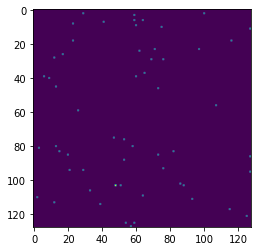

In [12]:
plt.imshow(np.mean(stemp[100:110], axis=0))

# Run through

In [121]:
%load_ext autoreload
%autoreload 2

import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.spatial import KDTree

from os.path import join as pjoin
from tools.utils import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [122]:
wdir = '/home/mattho/data'
theta = np.loadtxt(pjoin(wdir, 'quijote', 'latin_hypercube_params.txt'))

lhid = 0
source_dir = pjoin(wdir, f'cmass-ili/borg-quijote/latin_hypercube_HR-L3000-N384/{lhid}')

In [123]:
def load_rho(snid):
    rho = np.load(pjoin(wdir, 
                        f'quijote/density_field/latin_hypercube/{snid}',
                        'df_m_128_z=0.npy'))
    return rho

def load_hhalos(snid):
    snapdir = f'/home/mattho/data/quijote/Halos/latin_hypercube/{snid}'
    pos_h, mass, vel_h, Npart = load_quijote_halos(snapdir)
    posm = np.concatenate([pos_h, np.log10(mass)[:,None]], axis=1)
    h, edges = np.histogramdd(
        posm, 
        (128,128,128,10),
        range=[(0,1e3)]*3+[(12.8,15.8)]
    )
    return h, edges

def load_borg(snid):
    snapdir = pjoin(wdir, f'cmass-ili/borg-quijote/latin_hypercube_HR-L3000-N384/{snid}')
    rho = np.load(pjoin(snapdir, 'rho.npy'))
    ppos = np.load(pjoin(snapdir, 'ppos.npy'))
    pvel = np.load(pjoin(snapdir, 'pvel.npy'))
    return rho, ppos, pvel

In [124]:
rho1g = load_rho(lhid)
hhalos1g, edges = load_hhalos(lhid)

In [125]:
law = TruncatedPowerLaw()
def f(ind):
    popt = law.fit(rho1g.flatten(), hhalos1g[...,ind].flatten())
    return popt

popt = np.array(list(map(f, range(10))))

Optimization terminated successfully.
         Current function value: 0.166256
         Iterations: 299
         Function evaluations: 515
Power law bias fit params: [0.59258007 0.         0.89106657 2.81125909]
Optimization terminated successfully.
         Current function value: 0.113654
         Iterations: 247
         Function evaluations: 430
Power law bias fit params: [0.50646564 0.         0.8845522  3.41196616]
Optimization terminated successfully.
         Current function value: 0.057587
         Iterations: 468
         Function evaluations: 797
Power law bias fit params: [4.11366820e-01 7.07622241e-08 8.13212777e-01 5.23286568e+00]
Power law bias fit params: [ 0.46379596  0.01583133  0.69225094 11.03586089]
Power law bias fit params: [0.05043707 0.66674758 0.80223184 6.87030194]
Optimization terminated successfully.
         Current function value: 0.003895
         Iterations: 227
         Function evaluations: 412
Power law bias fit params: [3.90510779e-04 2.23780825e+

In [127]:
hsamp = np.stack([law.sample(rho1g, popt[i]) for i in range(10)], axis=-1)
# hsamp = hhalos1g

In [128]:
xtrues = []
for i in range(10):
    xtrue, _, _ = sample_3d(
        hsamp[...,i], 
        np.sum(hsamp[...,i]).astype(int), 
        1000, 0, np.zeros(3))
    xtrues.append(xtrue.T)

[0.1755  0.06681 0.7737  0.8849  0.6641 ]


(-49.99742868025228, 1049.9918425044082, -49.99357834351357, 1049.991599173483)

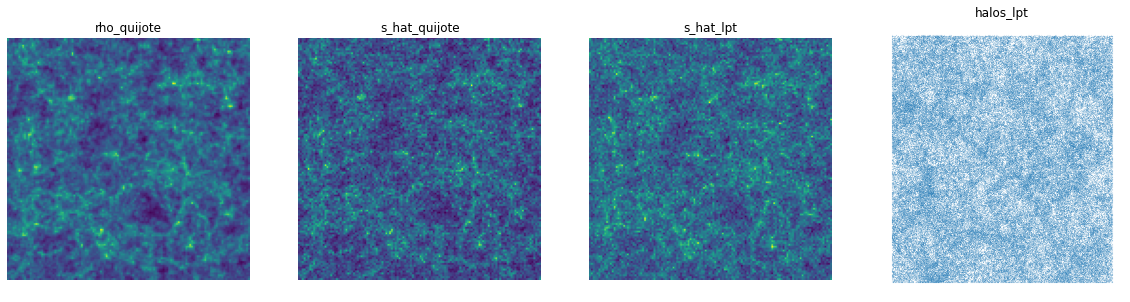

In [132]:
print(theta[lhid])
f, axs = plt.subplots(1,4, figsize=(20,5))
axs[0].imshow(np.mean(rho1g, axis=(0)))
axs[0].set_title('rho_quijote')
axs[0].axis('off')
axs[1].imshow(np.mean(hhalos1g, axis=(0,-1)))
axs[1].set_title('s_hat_quijote')
axs[1].axis('off')
axs[2].imshow(np.mean(hsamp, axis=(0,-1)))
axs[2].set_title('s_hat_lpt')
axs[2].axis('off')
axs[3].plot(np.concatenate(xtrues)[:,0], np.concatenate(xtrues)[:,1], '.', markersize=0.1)
axs[3].set_title('halos_lpt')
axs[3].axis('off')

(0.0, 100.0)

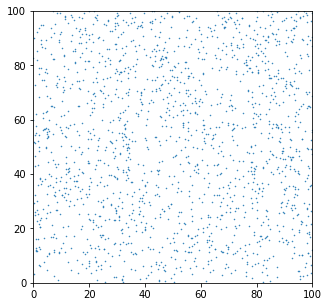

In [85]:
plt.figure(figsize=(5,5))
plt.plot(np.concatenate(xtrues)[:,0], np.concatenate(xtrues)[:,1], '.', markersize=1)
plt.xlim(0,100)
plt.ylim(0,100)

In [36]:
rho, ppos, pvel = load_borg(lhid)
tree = KDTree(ppos)

In [87]:
hsamp = np.stack([law.sample(rho, popt[i]) for i in range(10)], axis=-1)

In [88]:
xtrues = []
for i in range(10):
    xtrue, _, _ = sample_3d(
        hsamp[...,i], 
        np.sum(hsamp[...,i]).astype(int), 
        3000, 0, np.zeros(3))
    xtrues.append(xtrue.T)

[0.1755  0.06681 0.7737  0.8849  0.6641 ]


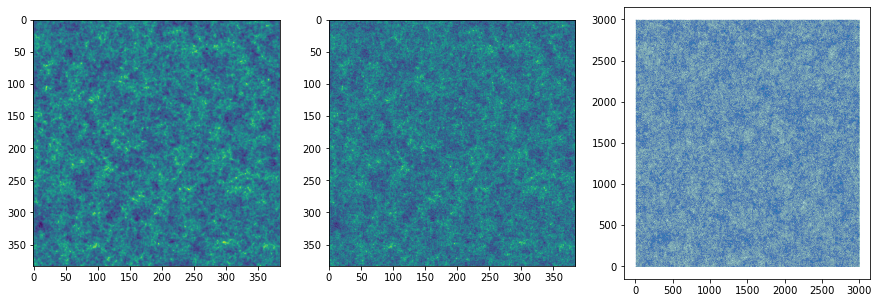

In [106]:
print(theta[lhid])
f, axs = plt.subplots(1,3, figsize=(15,5))
axs[0].imshow(np.mean(rho, axis=(0)))
axs[1].imshow(np.mean(hsamp, axis=(0,-1)))
axs[2].plot(np.concatenate(xtrues)[:,0], np.concatenate(xtrues)[:,1], 
            '.', markersize=0.1, alpha=0.05)

In [107]:
k=5
vtrues = []
for i in range(10):
    print(i)
    _, nns = tree.query(xtrues[i], k)
    vnns = pvel[nns.reshape(-1)].reshape(-1,k,3)
    vtrues.append(np.mean(vnns, axis=1))

In [94]:
_, nns = tree.query(xtrues[0], 5)

In [102]:
nns = nns.reshape(-1)
vnns = pvel[nns].reshape(-1,5,3)
vtrues = np.mean(vnns, axis=1)

In [115]:
mtrues = []
for i in range(len(edges)-1):
    im = np.random.uniform(*edges[-1][i:i+2], size=len(xtrues[i]))
    mtrues.append(im)

(array([852975., 854920., 853248., 638761., 532253., 531775., 432539.,
        229966., 231810., 230364.]),
 array([12.80000002, 12.89000001, 12.97999999, 13.06999998, 13.15999996,
        13.24999995, 13.33999993, 13.42999992, 13.5199999 , 13.60999989,
        13.69999987]),
 <BarContainer object of 10 artists>)

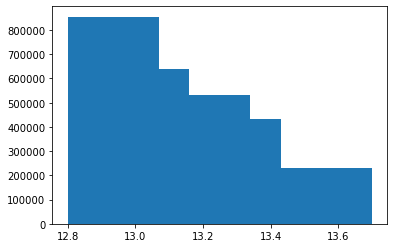

In [120]:
plt.hist(np.concatenate(mtrues))